In [6]:
# Linear Search 선형 탐색

# 보관된 데이터를 맨 앞부터 순서대로 원하는 값을 찾을 때까지 탐색한다.
# 탐색 처리는 반복 구조를 사용하여 기술한다.
# 반복 구조에서는 종료 조건을 잊지 말자

In [19]:
lst = [1,3,5,7,2,4]

target = int(input('찾을 정수 입력 >> '))
# count = 0

# for i in lst:
#     if target == i:
#         print(f'{count}번째 요소가 일치')
#         break
#     elif count == len(lst)-1:
#         print('찾지 못했습니다.')
#         break
#     count += 1

for i in range(0,len(lst)):
    if lst[i] == target:
        print(f'{i}번째 요소가 일치')
        break
    elif i == len(lst)-1:
        print('찾지 못했습니다.')
        break


찾을 정수 입력 >> 1
0번째 요소가 일치


In [30]:
def linear_search(target, lst):
    for i in range(0, len(lst)):
        if lst[i] == target:
            st = f'{i}번째 요소가 일치'
            return st
    st = '찾지 못했습니다.'
    return st

print(linear_search(6, [4,2,3,6,1])) 

3번째 요소가 일치


In [31]:
# Binary Search 이진 탐색법

# 이진 탐색법은 탐색하는 범위를 절반씩 줄여서 참색하는 방법이다.
# 데이터들이 먼저 오름차순이나 내림차순으로 정렬되어 있어야만 쓸수 있다.

# index	0    1    2    3   4    5    6
# data	11, 13, 17, 19, 23, 29, 31  찾는 값은 17

# 1st		   3번 index(가운데 index)를 먼저 확인
# 2st		   19 <- 17이 아니므로 3번 index 이후는 탐색범위에서 제외
# 		   (이진 탐색법은 정렬이되있기 때문)
# 3st	      1번 index(남은 index중 가운데) 확인
# 4st	      13 <-17이 아니고 좌측index는 탐색범위에서 제외됨


# 이진 탐색법의 알고리즘
# 1. 가운데 요소를 선택
# 2. 선택된 요소의 데이터와 찾는 데이터를 비교
# 3. 탐색 범위를 절반으로 줄이는 처리
# 위의 알고리즘이 반복된다.

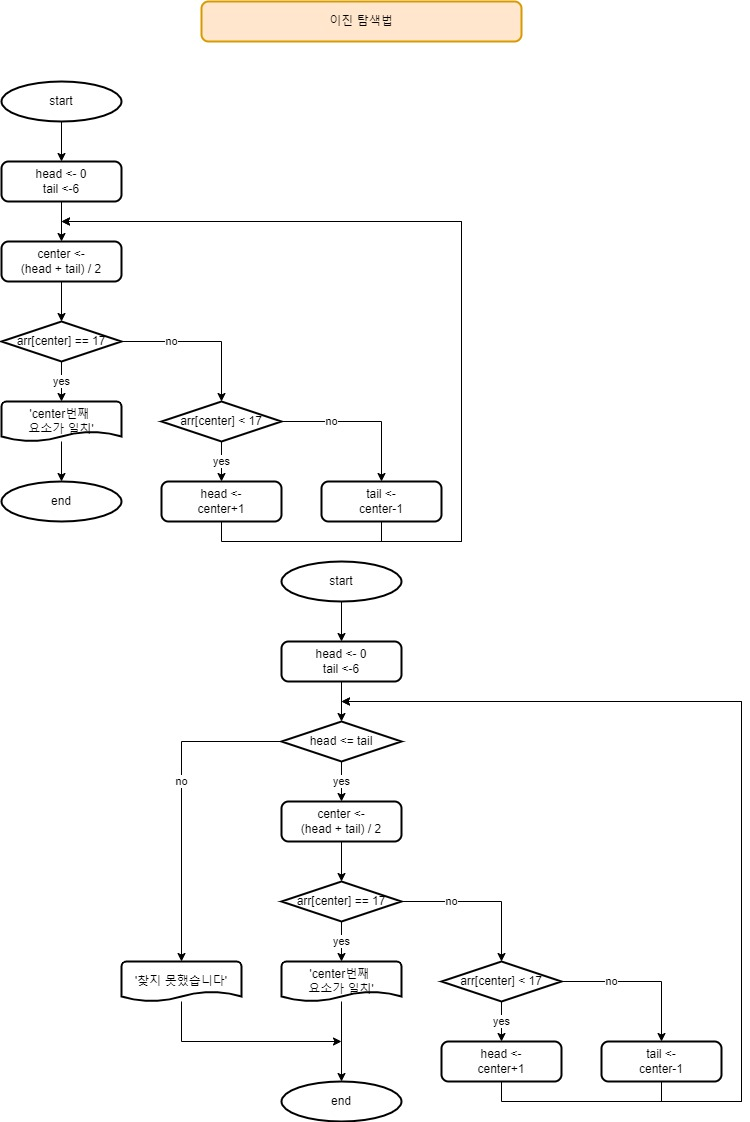

In [5]:
#이진탐색
#데이터는 정렬이 되어있고 반으로 나눠가며 비교
#여기서는 오름차순으로 정렬
def b_search(lst, target): #lst는 탐색할 데이터리스트, target은 찾을 값
    head = 0
    tail = len(lst)-1
#head와 tail은 탐색범위의 양끝의 index번호를 나타냄 
# -> head와 tail의 이동(값의 변화)는 탐색범위의 변화
    
    while head <= tail: #반복횟수를 예측하기 힘드므로 while
        center = (head+tail)//2 
        # 소수점은 필요 없으므로 몫만 구한다 (//)
        #int((head+tail)/2)로 소수점을 날려도된다.
        if target == lst[center]: #찾으려는 값과 lst중앙의 값이 같은지 비교
            result = f'{center}번 index요소와 일치'
            return result
        elif target > lst[center]: # target이 크다면
            head = center + 1 #head의 값을 조정(탐색범위의 축소)
        else: 
            tail = center - 1 #target이 작다면 tail을 조정(탐색범위의 축소)
    result = "찾지 못했습니다."        
    return result


lst = [i for i in range(24,100)]
print(f'{lst[0]}~{lst[-1]}까지의 데이터')
target = int(input('찾을 정수를 입력 >> '))

print(b_search(lst, target))

24~99까지의 데이터
찾을 정수를 입력 >> 59
35번 index요소와 일치


In [6]:
# Hash Search해시 탐색법

# 선형 탐색이나 이진 탐색의 전제 조건은 어떤 데이터가 어떤 요소(index)에 있는지
# 전혀 모르는 상태에서 검색을 시작한다는 것이다.
# 그러나 해시 탐색법은 데이터의 '내용'과  저장한 곳의 '요소'를 미리 저장할 때
# 연계를 해서 극히(***) 짧은 시간 안에 탐색할 수 있도록 고안된 알고리즘이다.

# 24인 데이터는 첨자 24에 넣고 36데이터는 첨자 36에 넣어두는 것
# 단지 2개의 데이터를 보관하는데 최소한 37개의 요소배열이 필요하다.
# -> 낭비가 심해진다.

# 해시 탐색법의 특징은 나중에 데이터를 쉽게 찾도록 보관하는 단계에서 사전 준비를
# 해두는 것이 특징이다.

# 가장 알기 쉬운 방법은 데이터를 데이터의 숫자와 같은 방에 넣어두는 것이다.
# 하지만 메모리의 불필요한 누수가 커진다. 따라서 

# 먼저 방을 7개를 준비한다. index0 ~ index6

# 0 1 2 3 4 5 6

# 11 15 23 26
# 11%7(index의 수) = 4
# 15%7 = 1
# 23%7 = 2
# 26%7 = 5
# 나머지를 이용하여 나머지 값과 같은 index에 배분한다.

#  방번호(해시값) = 데이터 % 7(방의갯수) <- 해시함수
# =========================================

# 해시 탐색법으로 데이터 찾는 방법

# 찾을때도 저장할때 사용한 해시 함수를 다시 사용
# 데이터 값 % 7  -> 인덱스 번호

# 따라서 해시 탐색법을 사용하면 단 한번의 계산으로 찾고자 하는 공을 찾을 수 있다.
# 검색 시간을 놀라울 정도로 단축시킬 수 있다는 큰 장점이 있다.

# 해시 함수로 데이터를 보관하는 알고리즘
# 	- 해시 함수는 데이터의 저장소 첨자를 계산한다.
# 	- 저장소의 첨자가 겹치는 것을 '충돌'이라고 한다.
# 	- 충돌이 발생하면 옆의 빈 요소에 데이터를 보관한다.

# 1. 배열은 2개 준비한다.

# -첫번째 배열은 데이터의 갯수만큼 준비한다. (임시배열) arrayD
# 0   1   2   3  4   5   6
# 12 25  36  20 30   8  42

# -두번째 배열은 11개를 준비하여 0으로 초기화 한다. (실제 저장될 배열) arrayH

# 0 1 2 3 4 5 6 7 8 9 10 11
# 0 0 0 0 0 0 0 0 0 0  0  0

# arrayD 첫번째 요소부터 순차적으로 해시값을 계산하여 arrayH로 저장한다.
# 지금은 요소수가 11개이므로 11로 나눈 나머지를 계산하여 저장한다.

# 해시값 = arrayD데이터 % 11(해시함수)

# 첫 번째 arrayD[0] = 12 를 해시함수에 넣어 계산하면 해시값은 1이 된다.

# 0  1   2  3  4  5  6  7  8  9  10  11
# 0 12  0  0  0  0  0  0  0  0   0    0

# 이미 다른 데이터가 할당 되어 있는지 확인하여 비어있으면 대입한다.
# 왜 확인이 필요하는냐는 다음에 자세히 나오지만 요소가 많으면 해시 값이
# 즉 나머지 값이 우연히 일치하는 경우가 많아 이미 데이터가 저장 되어 있을
# 가능성이 높다.

# 요소가 비어 있는지 확인 하려면 0이 있는지 확인하면 된다.

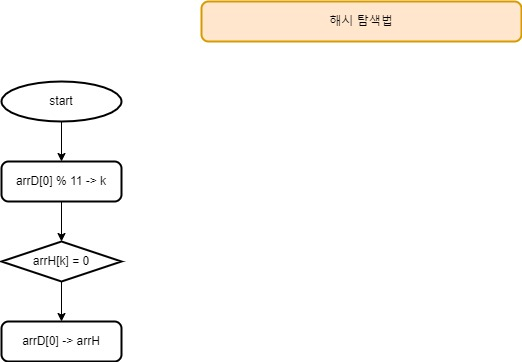

In [7]:
#위의 알고리즘에서 반복구조가 추가된다.

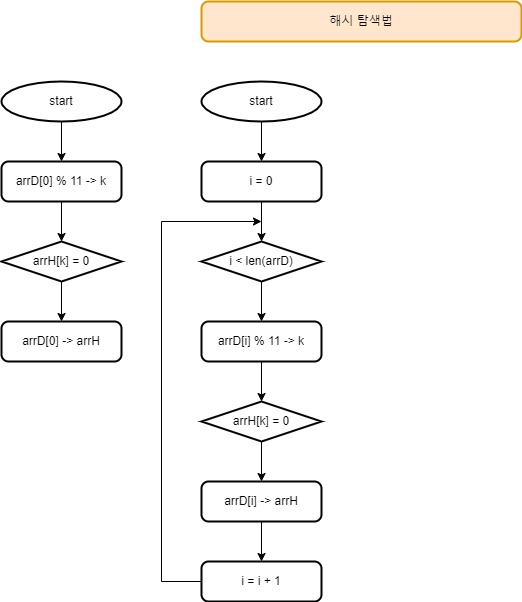

In [9]:
# 종료 조건도 필요하다. i의 최대값은 6이므로 7이 되었을 때 반복을 종료하도록 한다.
# 0  1  2  3  4   5  6
# 12 25 36 20 30  8  42

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0  0  0  0  0  0  0  0   0 

# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25  0  0  0  0  0  0   0 

# addD[2]의 데이터 36의 해시값은 3이다. 이미 데이터 25가 존재한다. 
# 0  1  2  3  4  5  6  7  8  9  10
# 0 12  0 25  0  0  0  0  0  0   0 

# 해시 탐색법에서는 이러한 해시값이 이미 존재하는 것을 '충돌' synonym 이라고 한다.

# 이러한 충돌이 발생하는 경우 즉 arrH[k] != 0 인 경우를 처리해야 한다.
# 해결책은 간단하다. 바로 옆의 요소가 비어 있으면 거기에 넣는다.
# arrH[k]옆의 요소는 arrH[k+1] 0인지의 여부를 확인한다.

***충돌에 대하여
충돌이 너무 자주 일어나면 추가적인 처리가 많이 필요하게 된다.
해시 탐색법의 장점이 무색해진다.
충돌이 일어나지 않게 하려면 데이터가 많이 흩어지도록 해야한다.

저장될 배열의 index가 커질수록 충돌의 가능성은 적어지지만 메모리의 사용량이 늘어나
알고리즘의 효율성이 떨어지게된다.

탐색 처리의 속도를 유지하는 것과 가능한 메모리를 적게 사용하는 index의 수는
일반적으로 저장 데이터의 수의 1.5배에서 2배라고 알려져 있다.

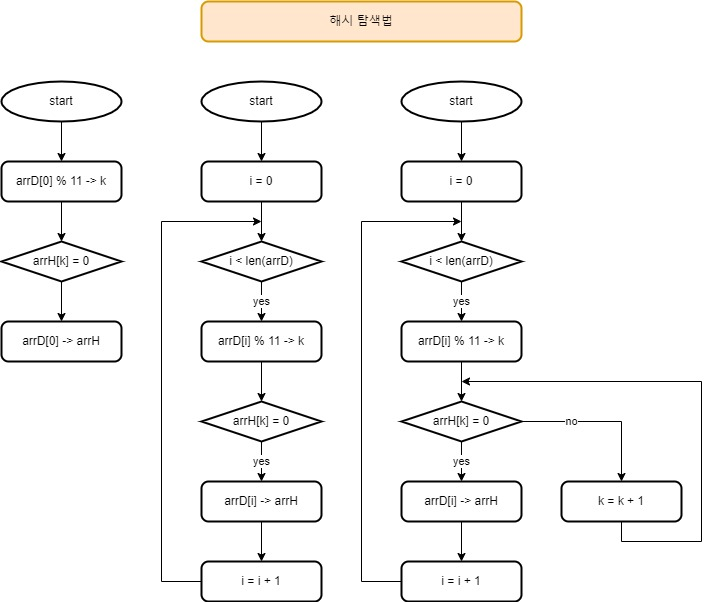

In [ ]:
# 0   1   2   3   4   5   6
# 12  25  36 20  30  8  42


# 0  1  2  3  4   5  6  7   8  9  10
# 0 12  0 25 36  0  0  0  0  20   0 


# 0  1  2  3  4   5  6  7   8  9  10
# 0 12  0 25 36  0  0  0  30  20  0 


# 0  1  2  3  4   5  6  7   8  9  10
# 0 12  0 25 36  0  0  0  30  20  0 
                                 --    <- 8  충돌 발생

# 0  1  2  3  4   5  6  7   8   9  10
# 0 12  0 25 36  0  0  0  30  20  0 
                                 --   --    <- 9  충돌 발생   

# 0  1  2  3  4   5  6  7   8   9  10
# 0 12  0 25 36  0  0  0  30  20  8  
                                          --     

마지막 요소인 42는 해시값이 9다. arrH[9]에 이미 데이터가 존재하고 
arrH[10]에도 이미 데이터가 존재한다. 그리고 그 이상의 값은 없다.   

좀 더 간단한 방법을 사용해 보자. k를 하나 증가시키는 처리 k + 1 -> k 의
k+1을 arrH의 길이로 나누어 그 나머지를 k에 대입하는 방법이다. 즉
(k+1) % 11 -> k

k값이 0에서 10인 경우에는 11로 나눌 필요가 없지만 k값이 10을 초과하는 경우의 처리를 별도로
준비하는 것은 비효율적이다. 두 경우 모두 11로 나누는 처리를 거친 값을 대입한다.
k값이 0에서 10인 경우에는 이 과정을 거친 후에도 원래값과 같아서 문제가 없다.
k가 10을 넘어 11이 된다면 나머지가 0이 된다.
만약 arrH[0]에도 이미 데이터가 있다면 (k+1=12) 12%11 = 1이 되어 바로 옆칸을 확인하는 처리를
진행하게 된다. 언젠가는 빈칸을 발견한다.

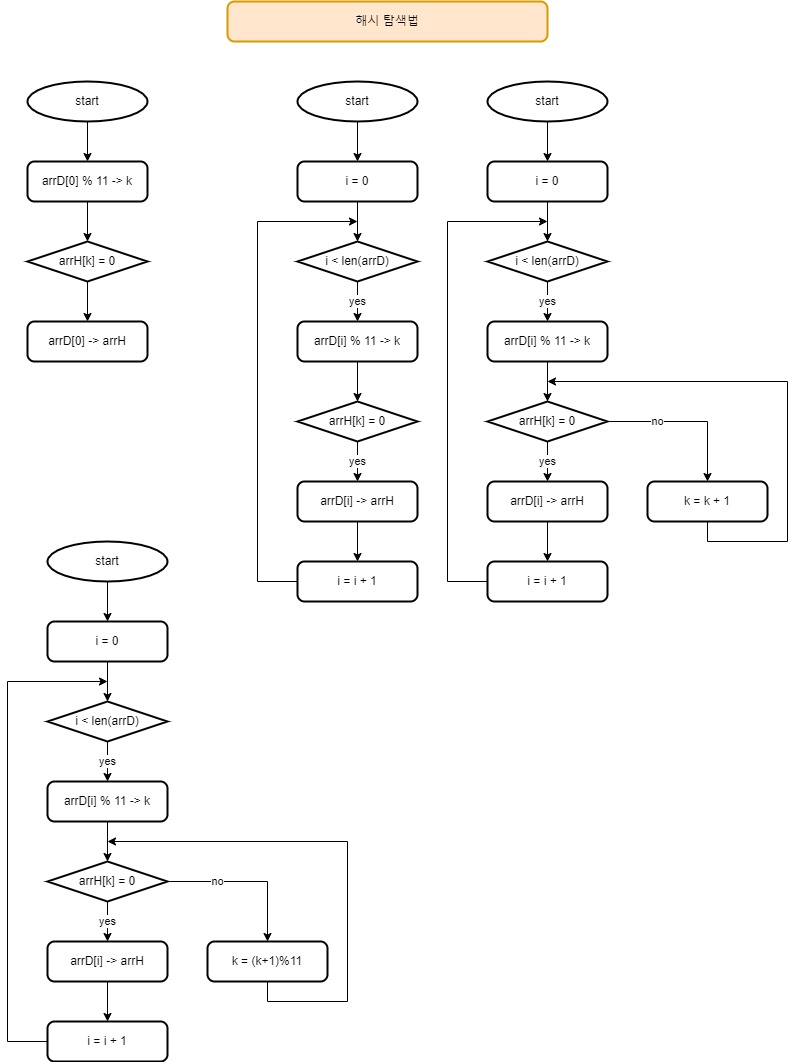

In [ ]:
마지막 데이터 42를 할당하고 i가 7이되어 반복처리를 종료하고 끝내게 된다. 
이제 arrD에 있는 7개의 데이터가 모두 arrH의 요소에 저장되었다. 

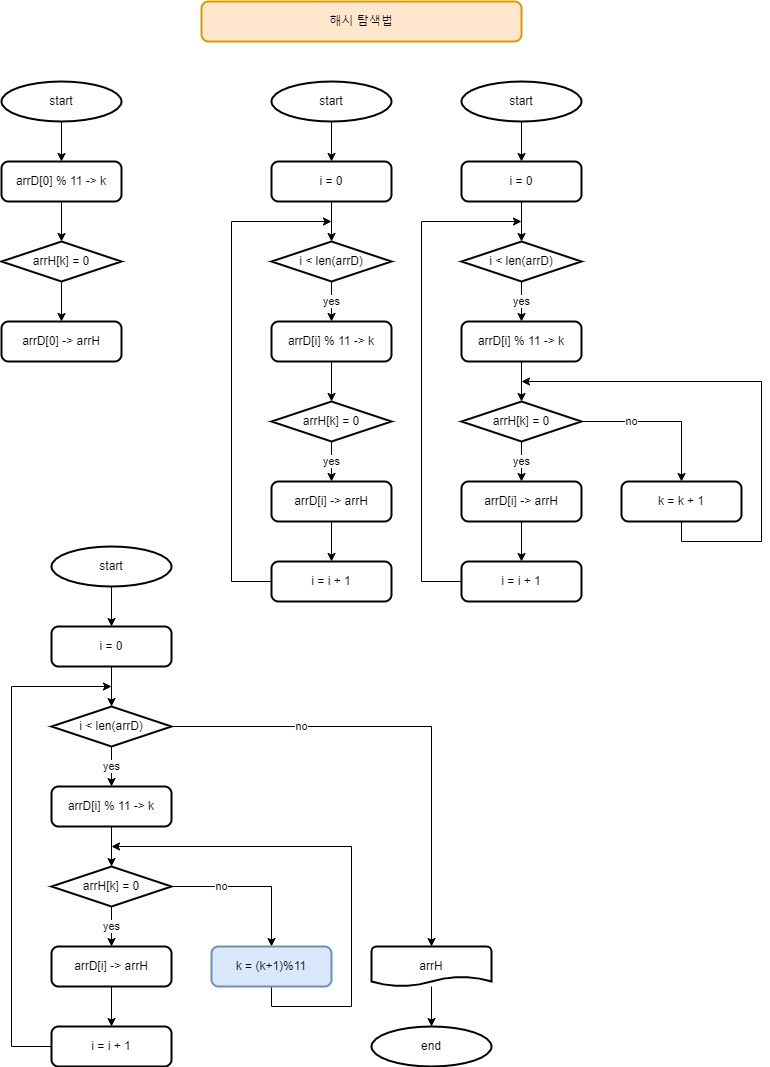